In [19]:
#pip install umap-learn


In [20]:
#pip install seaborn


In [7]:
# from google.colab import drive
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier

# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('mdata.csv')
X = df.drop('userid',axis=1)
Y = df['userid']


# **Visualization**

In [10]:
#Visualization

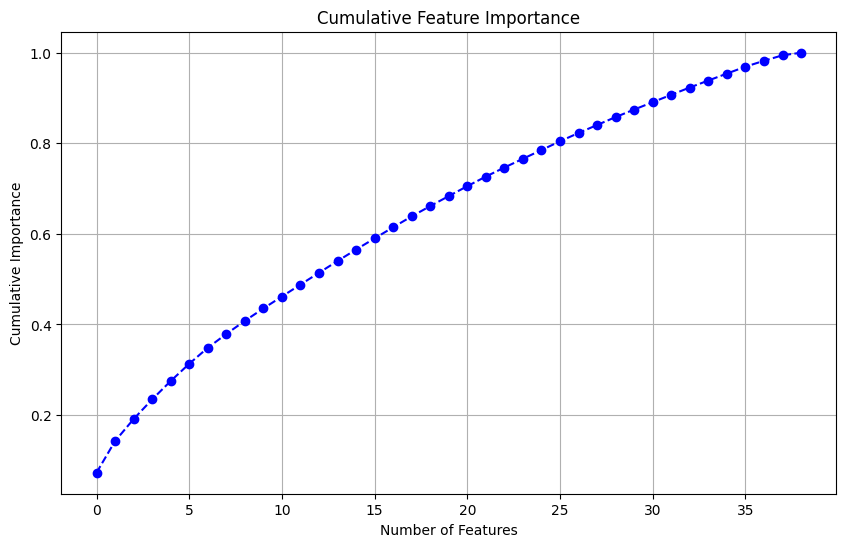

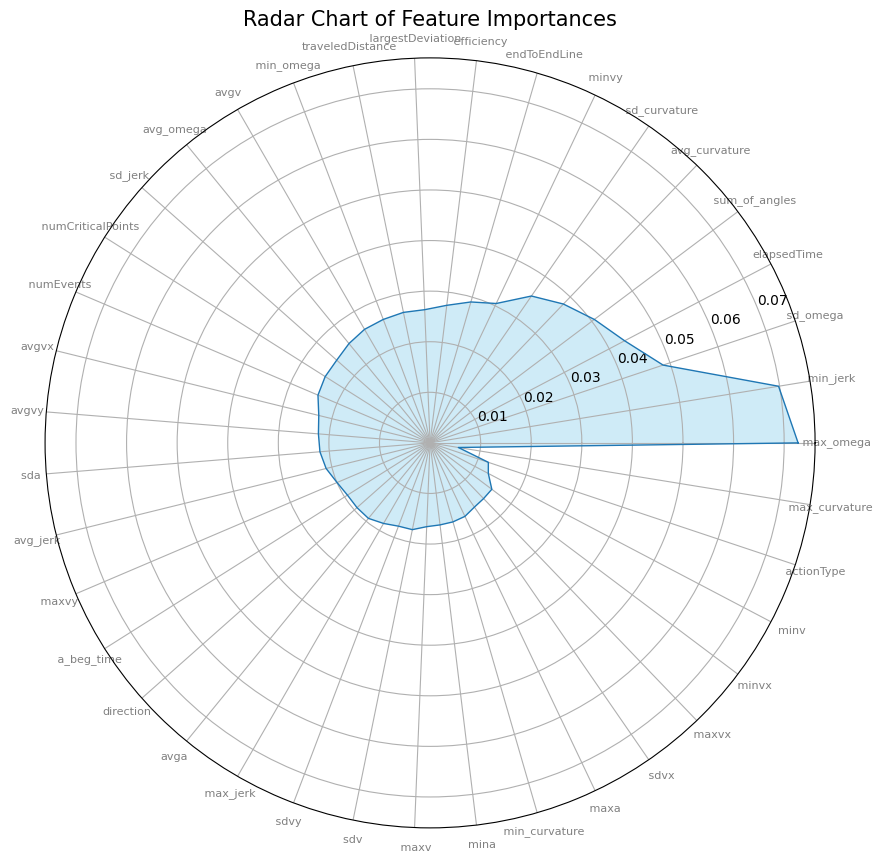

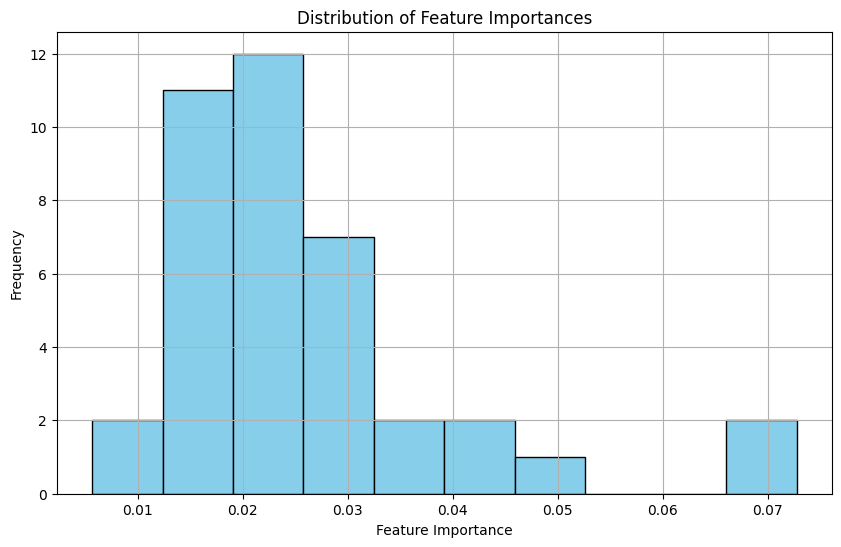

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.inspection import plot_partial_dependence
#from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

import seaborn as sns
from math import pi


# Example data setup (replace with your actual dataset and features)
# X = feature matrix, Y = target labels
# df = your DataFrame with features and target

# Train the Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy')
decision_tree.fit(X, Y)
features_list = list(df.drop(['userid'], axis=1))

# Calculate feature importances
def calculate_feature_importances(model, features):
    importances = model.feature_importances_
    feature_importance_dict = dict(zip(features, importances))
    sorted_features = sorted(feature_importance_dict, key=feature_importance_dict.get, reverse=True)
    sorted_importances = [feature_importance_dict[feature] for feature in sorted_features]
    return sorted_features, sorted_importances

sorted_features, sorted_importances = calculate_feature_importances(decision_tree, features_list)



# 2. Cumulative Feature Importance
cumulative_importance = np.cumsum(sorted_importances)
plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_features)), cumulative_importance, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance")
plt.grid()
plt.show()




# 7. Radar Chart
df_importances = pd.DataFrame({'features': sorted_features, 'importance': sorted_importances})
categories = df_importances['features']
values = df_importances['importance']

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
values = list(values) + [values[0]]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)
plt.title("Radar Chart of Feature Importances", size=15)
plt.show()

# 8. Distribution of Feature Importances
plt.figure(figsize=(10, 6))
plt.hist(sorted_importances, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Feature Importance")
plt.ylabel("Frequency")
plt.title("Distribution of Feature Importances")
plt.grid()
plt.show()


# **UMAP**

/Users/sunnydhaka/Downloads/sem7/ML/2021429_HW3/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


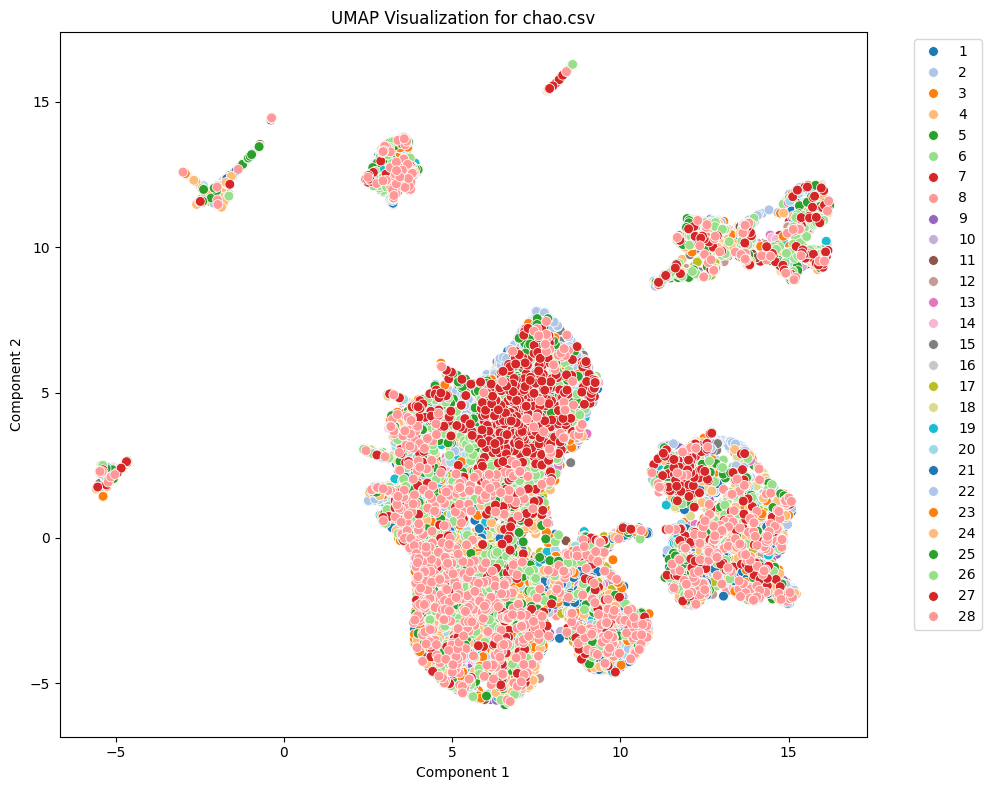

/Users/sunnydhaka/Downloads/sem7/ML/2021429_HW3/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


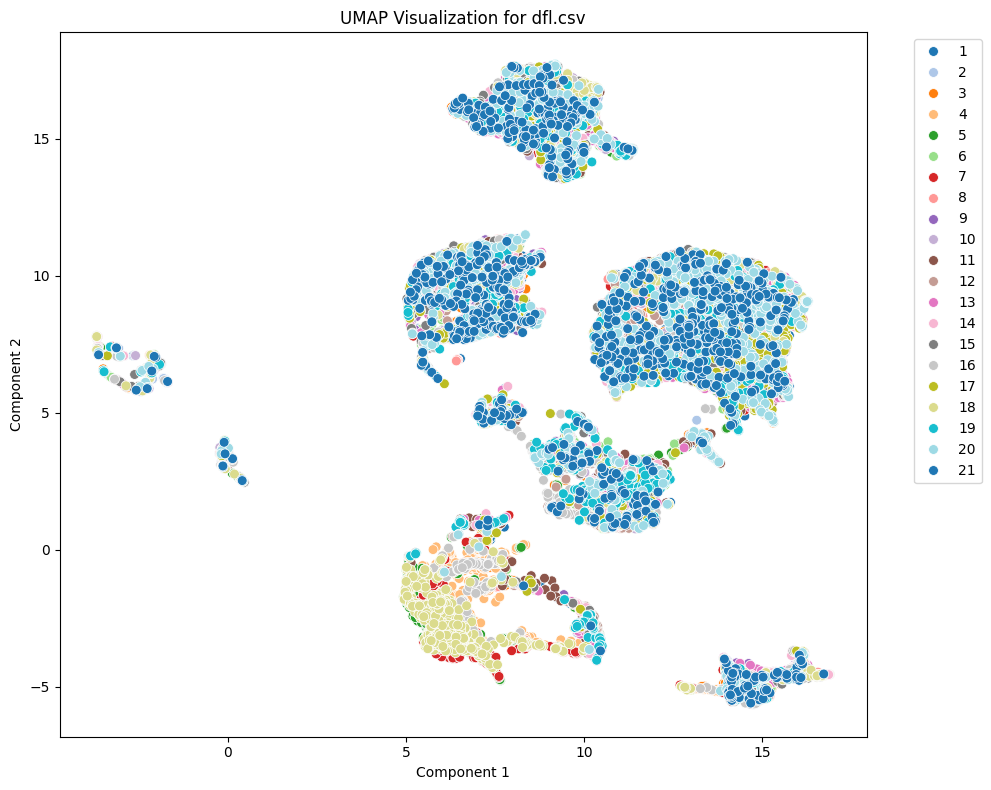

In [5]:
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

def umap_visualization(file_path, label_column, n_components=2, random_state=1):
    # Load and preprocess data
    df = pd.read_csv(file_path)
    X = df.drop(label_column, axis=1)
    Y = df[label_column]
    
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply UMAP
    umap = UMAP(n_components=n_components, random_state=random_state)
    umap_data = pd.DataFrame(umap.fit_transform(X_scaled), columns=['Component 1', 'Component 2'])
    umap_data['Label'] = Y.values

    # Plot UMAP visualization
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=umap_data,
        x='Component 1',
        y='Component 2',
        hue='Label',
        palette='tab20',
        s=50,
        legend="full"
    )
    plt.title(f'UMAP Visualization for {file_path}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example Usage
umap_visualization('chao.csv', label_column='userid')
umap_visualization('dfl.csv', label_column='userid')


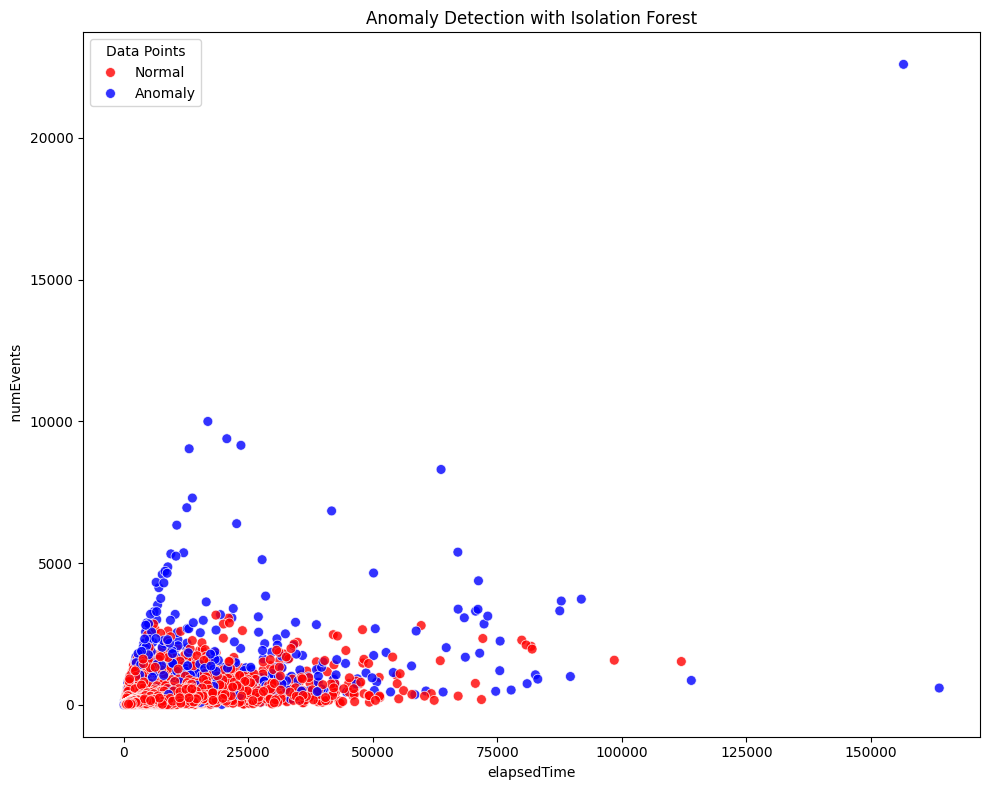

Anomaly
Normal     19950
Anomaly     1050
Name: count, dtype: int64


In [6]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

def detect_anomalies(file_path, contamination=0.05, random_state=42):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Use all numeric features for anomaly detection
    X = df.select_dtypes(include='number')

    # Train Isolation Forest
    model = IsolationForest(contamination=contamination, random_state=random_state)
    df['Anomaly'] = model.fit_predict(X)

    # Label anomalies (-1 = anomaly, 1 = normal)
    df['Anomaly'] = df['Anomaly'].map({-1: 'Anomaly', 1: 'Normal'})

    # Visualize anomalies
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=X.columns[0], y=X.columns[1], hue='Anomaly', palette=['red', 'blue'], s=50, alpha=0.8)
    plt.title('Anomaly Detection with Isolation Forest')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend(title='Data Points')
    plt.tight_layout()
    plt.show()

    return df

# Example Usage
anomalies = detect_anomalies('dfl.csv', contamination=0.05)  # Replace with your file
print(anomalies['Anomaly'].value_counts())  # Count anomalies


In [13]:
#pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_clf = XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_xgb)

print(classification_report(y_pred_original, y_test_original))

# Train the model
xgb_model = train_xgb_classifier(X_train, y_train)

# Save the trained XGBoost model to a pickle file
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
    
# Evaluate the model
evaluate_xgb_classifier(xgb_model, X_test, y_test)



              precision    recall  f1-score   support

           1       0.67      0.74      0.70       671
           2       0.86      0.81      0.84       815
           3       0.82      0.76      0.79       846
           4       0.85      0.86      0.85       715
           5       0.66      0.67      0.67       749
           6       0.69      0.72      0.71       707
           7       0.79      0.79      0.79       747
           8       0.80      0.81      0.80       724
           9       0.71      0.71      0.71       792
          10       0.74      0.70      0.72       843
          11       0.77      0.71      0.74       820
          12       0.75      0.75      0.75       775
          13       0.66      0.71      0.68       675
          14       0.72      0.74      0.73       758
          15       0.69      0.68      0.68       751
          16       0.83      0.79      0.81       800
          17       0.76      0.80      0.78       764
          18       0.79    

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define function to calculate model accuracy
def model_accuracy(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Define models
models = {
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Features and target

# Standardize features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Apply PCA (choose 95% variance explained)
# pca = PCA(n_components=10)  # Retain 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train models and save to pickle
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Save model to pickle file
    with open(f'{name}_model_with_pca.pkl', 'wb') as f:
        pickle.dump(model, f)
        
    # Print accuracy
    print(f"Accuracy for {name}: {model_accuracy(X_train, y_train, X_test, y_test, model)}")

Training Decision Trees...
Accuracy for Decision Trees: 0.7127282491944146
Training Random Forest...
Accuracy for Random Forest: 0.7368421052631579
Training Logistic Regression...
Accuracy for Logistic Regression: 0.14344790547798067


In [22]:
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model accuracy function
def model_accuracy(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Models dictionary
models = {
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Prepare dataset
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models and save to pickle
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    # Save model to pickle file
    with open(f'{name}_model_without_pca.pkl', 'wb') as f:
        pickle.dump(model, f)
        
    # Print accuracy
    print(f"Accuracy for {name}: {model_accuracy(X_train, y_train, X_test, y_test, model)}")


Training Decision Trees...
Accuracy for Decision Trees: 0.7494092373791622
Training Random Forest...
Accuracy for Random Forest: 0.7929108485499463
Training Logistic Regression...
Accuracy for Logistic Regression: 0.17669172932330826


# MLP

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 100,test_size=0.2)

In [9]:
def train_mlp_classifier(X_train, y_train, hidden_layer_sizes=(300, 200, 100), random_state=1, max_iter=300):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=random_state, max_iter=max_iter)
    mlp.fit(X_train, y_train)
    return mlp

def evaluate_mlp_classifier(mlp, X_test, y_test):
    y_pred = mlp.predict(X_test)
    print(classification_report(y_pred, y_test))
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc}")

mlp_model = train_mlp_classifier(X_train, y_train)

# Save the trained XGBoost model to a pickle file
with open('MLP_model.pkl', 'wb') as f:
    pickle.dump(mlp_model, f)
evaluate_mlp_classifier(mlp_model, X_test, y_test)

NameError: name 'X_train' is not defined

In [8]:
evaluate_mlp_classifier(mlp_model, X_train, y_train)

NameError: name 'evaluate_mlp_classifier' is not defined